In [180]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [181]:
df = pd.read_csv("books.csv", on_bad_lines='skip')

In [182]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [183]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [185]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [186]:
df.duplicated().sum()


0

In [187]:
reportdf = ProfileReport(df)
reportdf

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [188]:
df['authors'] = df['authors'].str.split('/').str[0]


In [189]:
df.drop(['bookID', 'isbn13'], axis = 1, inplace=True)

In [190]:
df_with_isbn = df

In [191]:
df.drop(['isbn'], inplace = True, axis = 1)

In [192]:
df['year'] = df['publication_date'].str.split('/')
df['year'] = df['year'].apply(lambda x: x[2])

In [193]:
df.drop(['publication_date'], inplace = True, axis = 1)

In [194]:
df['year'] = df['year'].astype('int64')

In [195]:
df.dtypes

title                  object
authors                object
average_rating        float64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publisher              object
year                    int64
dtype: object

In [196]:
df.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,eng,652,2095690,27591,Scholastic Inc.,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,eng,870,2153167,29221,Scholastic Inc.,2004
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,Scholastic,2003
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,eng,435,2339585,36325,Scholastic Inc.,2004
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,eng,2690,41428,164,Scholastic,2004


In [197]:
df['publisher'] = df['publisher'].replace('Scholastic Inc.', 'Scholastic')


In [198]:
df.publisher.value_counts()

publisher
Vintage                        318
Penguin Books                  261
Penguin Classics               184
Mariner Books                  150
Ballantine Books               144
                              ... 
Marlowe & Company                1
University Press of America      1
Abstract Studio                  1
Jones & Bartlett Publishers      1
VeloPress                        1
Name: count, Length: 2289, dtype: int64

In [199]:
df.groupby(['year'])['title'].agg('count').sort_values(ascending = False).head(20)

year
2006    1700
2005    1260
2004    1069
2003     931
2002     798
2001     656
2000     534
2007     518
1999     450
1998     396
1997     290
1996     250
1995     249
1994     220
1992     183
1993     165
1991     151
1989     118
1990     117
1987      88
Name: title, dtype: int64

/home/mcb76/miniconda3/envs/tftest1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mcb76/miniconda3/envs/tftest1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


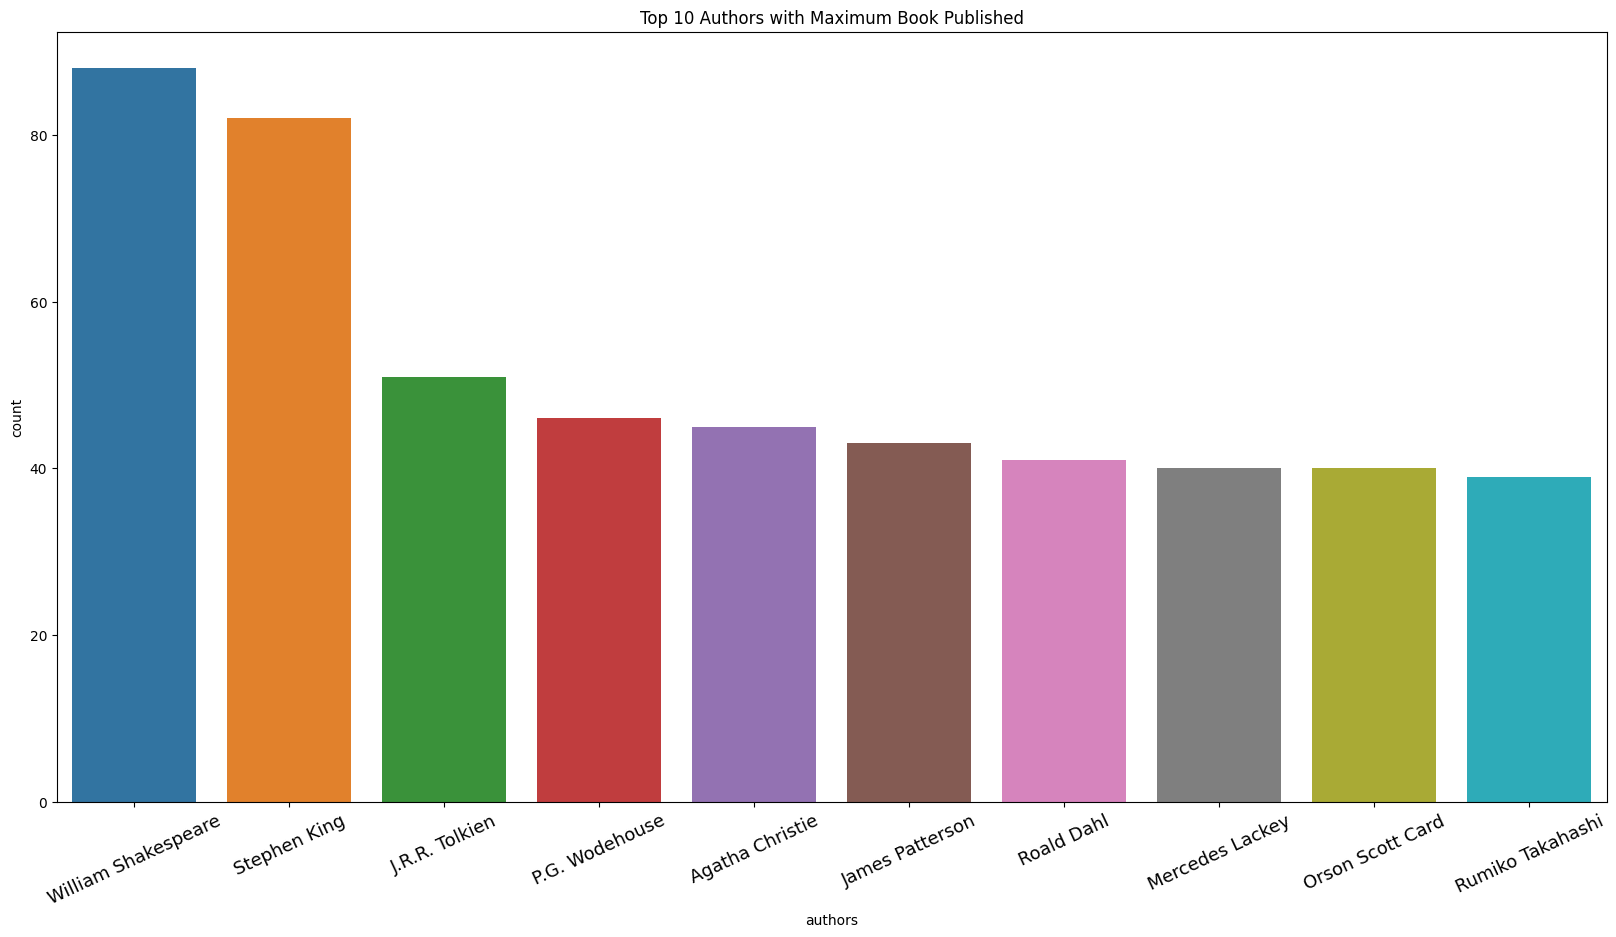

In [200]:
plt.figure(figsize=(20, 10))
sns.countplot(x = 'authors', data = df, order = df['authors'].value_counts().iloc[:10].index)
plt.title("Top 10 Authors with Maximum Book Published")
plt.xticks(fontsize=13, rotation = 25)
plt.show()

In [201]:
df.language_code.value_counts()

language_code
eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: count, dtype: int64

/home/mcb76/miniconda3/envs/tftest1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mcb76/miniconda3/envs/tftest1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


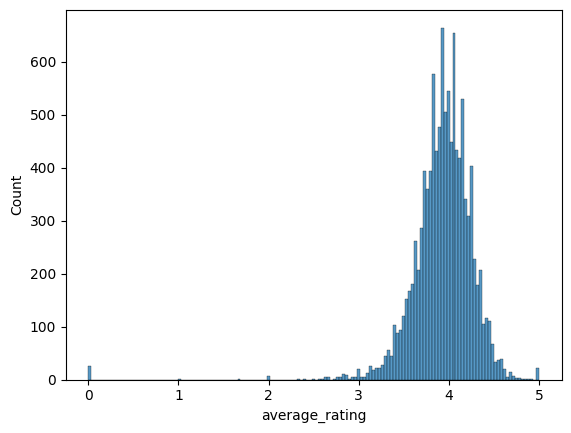

In [202]:
sns.histplot(df['average_rating'])
plt.show()

/home/mcb76/miniconda3/envs/tftest1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mcb76/miniconda3/envs/tftest1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mcb76/miniconda3/envs/tftest1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


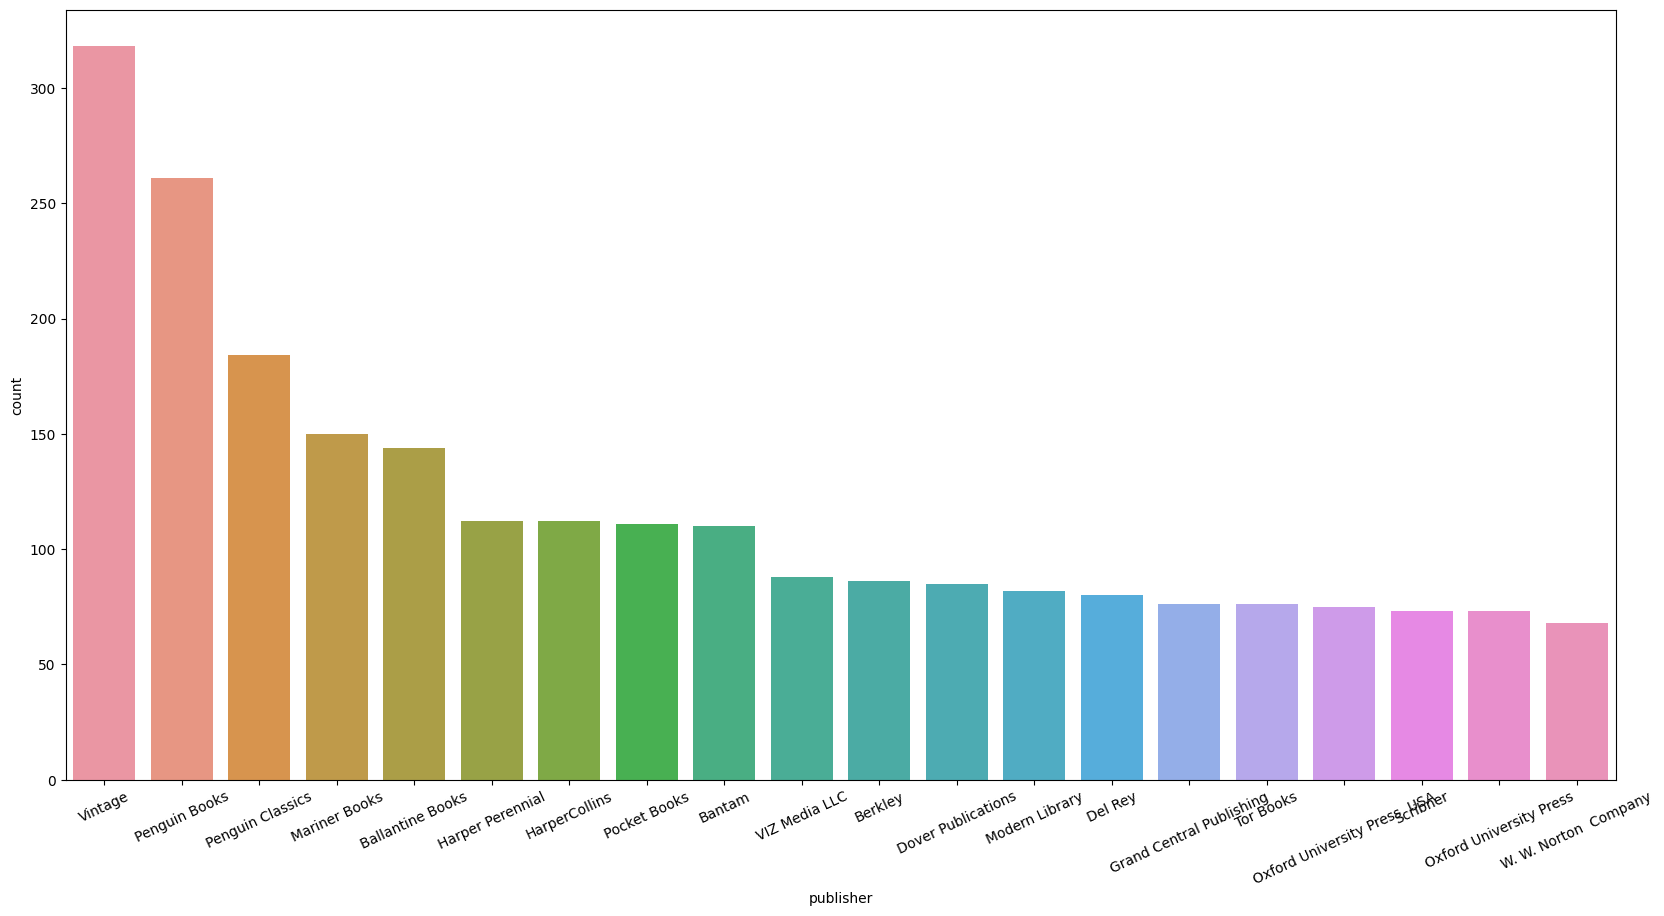

In [203]:
plt.figure(figsize = (20,10))
publisher = df['publisher'].value_counts()[:20]
sns.barplot(x = publisher.index, y = publisher)
plt.xticks(rotation = 25)
plt.show()

RECOMMENDER SYSTEM BASED ON PUBLISHER

In [204]:
def rec_book_publisher(x):
    a = df[df['publisher'] == x][['title', 'average_rating']]
    a = a.sort_values(by = 'average_rating', ascending = False)
    return a.head(10)

In [205]:
rec_book_publisher('Penguin Books')

,title,average_rating
4244,The Complete Maus,4.55
5564,The Penguin Companion to European Literature,4.50
1381,Before The Mayflower A History of Black America,4.44
4602,Selected Non-Fictions,4.43
3011,The Read-Aloud Handbook,4.41
4551,Life With Jeeves (Jeeves #6 2 & 4),4.39
1275,East of Eden,4.37
3304,Ludwig Wittgenstein: The Duty of Genius,4.36
4980,Life at Blandings,4.35
10867,The Portable Dorothy Parker,4.34


In [206]:
@interact
def rec_book_publisher(publisher_name = list(df['publisher'].value_counts().index)):
    a = df[df['publisher'] == publisher_name][['title', 'average_rating']]
    a = a.sort_values(by = 'average_rating', ascending = False)
    return a.head(10)

interactive(children=(Dropdown(description='publisher_name', options=('Vintage', 'Penguin Books', 'Penguin Cla…

In [207]:
@interact
def rec_book_author(author_name = list(df['authors'].value_counts().index)):
    a = df[df['authors'] == author_name][['title', 'average_rating']]
    a = a.sort_values(by = 'average_rating', ascending = False)
    return a.head(10)

interactive(children=(Dropdown(description='author_name', options=('William Shakespeare', 'Stephen King', 'J.R…

In [208]:
@interact
def rec_book_lang(lang = list(df['language_code'].value_counts().index)):
    a = df[df['language_code'] == lang][['title', 'average_rating']]
    a = a.sort_values(by = 'average_rating', ascending = False)
    return a.head(10)

interactive(children=(Dropdown(description='lang', options=('eng', 'en-US', 'spa', 'en-GB', 'fre', 'ger', 'jpn…

DATA PREPROCESSING

In [209]:
df.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,eng,652,2095690,27591,Scholastic,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,eng,870,2153167,29221,Scholastic,2004
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,Scholastic,2003
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,eng,435,2339585,36325,Scholastic,2004
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,eng,2690,41428,164,Scholastic,2004


In [210]:
def num_to_obj(x):
    if x > 0 and x <= 1:
        return "between 0 and 1"
    if x > 1 and x <= 2:
        return "between 1 and 2"
    if x > 2 and x <= 3:
        return "between 2 and 3"
    if x > 3 and x <= 4:
        return "between 3 and 4"
    if x > 4 and x <= 5:
        return "between 4 and 5"
    
df['rating_obj'] = df['average_rating'].apply(num_to_obj)


In [211]:
df.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher,year,rating_obj
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,eng,652,2095690,27591,Scholastic,2006,between 4 and 5
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,eng,870,2153167,29221,Scholastic,2004,between 4 and 5
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,Scholastic,2003,between 4 and 5
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,eng,435,2339585,36325,Scholastic,2004,between 4 and 5
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,eng,2690,41428,164,Scholastic,2004,between 4 and 5


In [212]:
columns_to_encode = ['language_code', 'rating_obj']
df_encoded = pd.get_dummies(df, columns=columns_to_encode)

In [213]:
df_encoded.head()

,title,authors,average_rating,num_pages,ratings_count,text_reviews_count,publisher,year,language_code_ale,language_code_ara,...,language_code_srp,language_code_swe,language_code_tur,language_code_wel,language_code_zho,rating_obj_between 0 and 1,rating_obj_between 1 and 2,rating_obj_between 2 and 3,rating_obj_between 3 and 4,rating_obj_between 4 and 5
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,652,2095690,27591,Scholastic,2006,False,False,...,False,False,False,False,False,False,False,False,False,True
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,870,2153167,29221,Scholastic,2004,False,False,...,False,False,False,False,False,False,False,False,False,True
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,352,6333,244,Scholastic,2003,False,False,...,False,False,False,False,False,False,False,False,False,True
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,435,2339585,36325,Scholastic,2004,False,False,...,False,False,False,False,False,False,False,False,False,True
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,2690,41428,164,Scholastic,2004,False,False,...,False,False,False,False,False,False,False,False,False,True


In [214]:
df_encoded.drop(['authors', 'publisher', 'year'], axis = 1,  inplace=True)

In [215]:
df_encoded.head()

,title,average_rating,num_pages,ratings_count,text_reviews_count,language_code_ale,language_code_ara,language_code_en-CA,language_code_en-GB,language_code_en-US,...,language_code_srp,language_code_swe,language_code_tur,language_code_wel,language_code_zho,rating_obj_between 0 and 1,rating_obj_between 1 and 2,rating_obj_between 2 and 3,rating_obj_between 3 and 4,rating_obj_between 4 and 5
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,652,2095690,27591,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,Harry Potter and the Order of the Phoenix (Har...,4.49,870,2153167,29221,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,Harry Potter and the Chamber of Secrets (Harry...,4.42,352,6333,244,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,435,2339585,36325,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,2690,41428,164,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [216]:
df_encoded.set_index('title', inplace=True)

In [217]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(df_encoded)
#features_scaled

/home/mcb76/miniconda3/envs/tftest1/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/mcb76/miniconda3/envs/tftest1/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/mcb76/miniconda3/envs/tftest1/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/mcb76/miniconda3/envs/tftest1/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be

ML MODEL

In [218]:
from sklearn import neighbors
model = neighbors.NearestNeighbors(n_neighbors=5, algorithm='ball_tree', metric='euclidean')
model.fit(df_encoded)
dist, idlist = model.kneighbors(df_encoded)

/home/mcb76/miniconda3/envs/tftest1/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/mcb76/miniconda3/envs/tftest1/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/mcb76/miniconda3/envs/tftest1/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


/home/mcb76/miniconda3/envs/tftest1/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/mcb76/miniconda3/envs/tftest1/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/mcb76/miniconda3/envs/tftest1/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [219]:
@interact
def bookRecommender(book_name = list(df['title'].value_counts().index)):
    book_list_name = []
    book_id = df[df['title'] == book_name].index
    book_id = book_id[0]
    for new_id in idlist[book_id]:
        book_list_name.append(df.iloc[new_id].title)
    return book_list_name

interactive(children=(Dropdown(description='book_name', options=('The Iliad', 'The Brothers Karamazov', 'The O…

In [220]:
df_encoded.to_csv('final.csv')

In [221]:
df2 = pd.read_csv('final.csv')
df2.set_index('title', inplace=True)
df2.head()

,average_rating,num_pages,ratings_count,text_reviews_count,language_code_ale,language_code_ara,language_code_en-CA,language_code_en-GB,language_code_en-US,language_code_eng,...,language_code_srp,language_code_swe,language_code_tur,language_code_wel,language_code_zho,rating_obj_between 0 and 1,rating_obj_between 1 and 2,rating_obj_between 2 and 3,rating_obj_between 3 and 4,rating_obj_between 4 and 5
title,,,,,,,,,,,,,,,,,,,,,
Harry Potter and the Half-Blood Prince (Harry Potter #6),4.57,652,2095690,27591,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
Harry Potter and the Order of the Phoenix (Harry Potter #5),4.49,870,2153167,29221,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
Harry Potter and the Chamber of Secrets (Harry Potter #2),4.42,352,6333,244,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
Harry Potter and the Prisoner of Azkaban (Harry Potter #3),4.56,435,2339585,36325,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
Harry Potter Boxed Set Books 1-5 (Harry Potter #1-5),4.78,2690,41428,164,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


In [222]:
df.to_csv("dfbeforeprocess.csv")